# Play with data

In [5]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
import pymongo
import pandas as pd
import numpy as np
from pymongo import MongoClient


In [6]:
# https://github.com/microsoft/WSL/issues/4619
# in mongodb.cfg:   bindIp: 0.0.0.0, 127.0.0.1
client = MongoClient('mongodb://192.168.0.100:27017')
client

MongoClient(host=['192.168.0.100:27017'], document_class=dict, tz_aware=False, connect=True)

In [7]:
db = client.geometry2
db

Database(MongoClient(host=['192.168.0.100:27017'], document_class=dict, tz_aware=False, connect=True), 'geometry2')

In [8]:
db.files.count_documents({})

7751

In [9]:
objects = db.objects

In [18]:
data = pd.DataFrame(list(objects.find()))

In [19]:
data.describe()

,Handle,Radius,Thickness,ArcEndAngle,ArcStartAngle
count,8.634700e+04,6195.000000,3676.0,18.000000,18.000000
mean,2.796642e+06,50.795516,0.0,1.598130,1.674363
std,7.198376e+06,133.141487,0.0,2.525919,2.622378
min,0.000000e+00,0.300000,0.0,0.000000,0.000000
25%,0.000000e+00,7.000000,0.0,0.000000,0.000000
50%,4.650000e+03,16.000000,0.0,0.000000,0.000000
75%,1.619556e+06,21.247436,0.0,3.412418,3.926991
max,3.642920e+07,2255.687100,0.0,6.152286,6.152286


In [20]:
data.groupby(['ClassName']).count().sort_values(['_id'], ascending = False)

,_id,TextString,ObjectId,Color,Layer,Linetype,LineWeight,FileId,GroupId,BlockId,...,PatternName,Loops,Thickness,ControlPoints,ArcEndAngle,ArcStartAngle,Pos1,CenterPoint,MajorAxisVector,MinorAxisVector
ClassName,,,,,,,,,,,,,,,,,,,,,
Line,60041,0,28461,60041,60041,60041,28461,60041,60041,0,...,0,0,0,0,0,0,0,0,0,0
Polyline,5225,0,4649,5225,5225,5225,4649,5225,5225,0,...,0,0,0,0,0,0,0,0,0,0
AlignedDimension,4160,0,4160,4160,4160,4160,4160,4160,4160,0,...,0,0,0,0,0,0,0,0,0,0
Arc,3676,0,1847,3676,3676,3676,1847,3676,3676,0,...,0,0,3676,0,0,0,0,0,0,0
Text,3384,3384,2881,3384,3384,3384,2881,3384,3384,0,...,0,0,0,0,0,0,0,0,0,0
Entity,2902,0,2902,2902,2902,2902,2902,2902,2902,0,...,0,0,0,0,0,0,0,0,0,0
Circle,2509,0,2509,2509,2509,2509,2509,2509,2509,0,...,0,0,0,0,0,0,0,0,0,0
Hatch,1155,0,0,1155,1155,1155,0,1155,1155,0,...,1155,1155,0,0,0,0,0,0,0,0
McNotePosition,1076,0,1076,1076,1076,1076,1076,1076,1076,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data[data['ClassName']=='AlignedDimension'].groupby(['GroupId']).count().sort_values(['_id'], ascending = False)

,_id,ClassName,TextString,ObjectId,Color,Layer,Linetype,LineWeight,FileId,BlockId,...,PatternName,Loops,Thickness,ControlPoints,ArcEndAngle,ArcStartAngle,Pos1,CenterPoint,MajorAxisVector,MinorAxisVector
GroupId,,,,,,,,,,,,,,,,,,,,,
e74c3bb1-d07c-4b81-aaca-ad713b33aa4e,87,87,0,87,87,87,87,87,87,0,...,0,0,0,0,0,0,0,0,0,0
9045440f-b43f-4c95-834f-05ea64666301,57,57,0,57,57,57,57,57,57,0,...,0,0,0,0,0,0,0,0,0,0
255bcd71-32ca-4f4c-8e91-ef08ea5f718e,52,52,0,52,52,52,52,52,52,0,...,0,0,0,0,0,0,0,0,0,0
9f112c3a-116e-4a71-b5e3-6544c3aafad1,48,48,0,48,48,48,48,48,48,0,...,0,0,0,0,0,0,0,0,0,0
fb06019c-f109-46ba-ab1e-fae62c5e711a,37,37,0,37,37,37,37,37,37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8e3664af-f0df-4a6b-9825-d10a9ae07c94,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
179ecf2a-ca38-4cc0-a8b6-94048fecf551,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1323d760-2c57-496e-9a57-f9f078140239,1,1,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize drawings

In [14]:
# links
# https://arxiv.org/pdf/1704.03477.pdf
# https://arxiv.org/pdf/1904.02632.pdf

In [15]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
from IPython.display import Image

# !pip install drawsvg
# Works on linux only!
# sudo apt-get install libcairo2
import drawSvg as draw

In [16]:
file_ids = objects.find().distinct('GroupId')
len(file_ids)

500

id: 00a8a649-9fd0-4295-be49-d9ddbe26cdc6 entities: 314


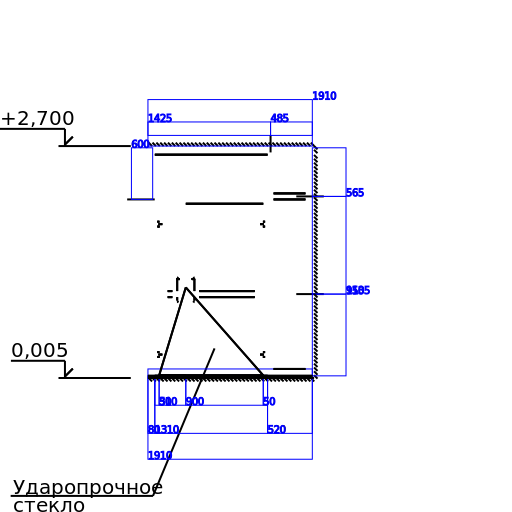

id: 01e96147-b009-4f74-b579-2f0a468ff182 entities: 739


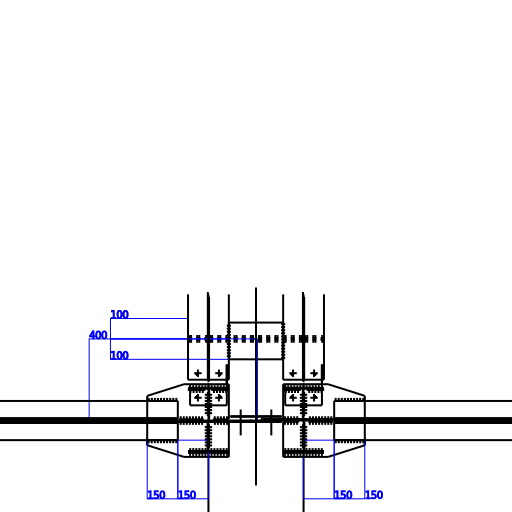

id: 02d25763-84e3-48dc-9c2f-25af7eddf197 entities: 95


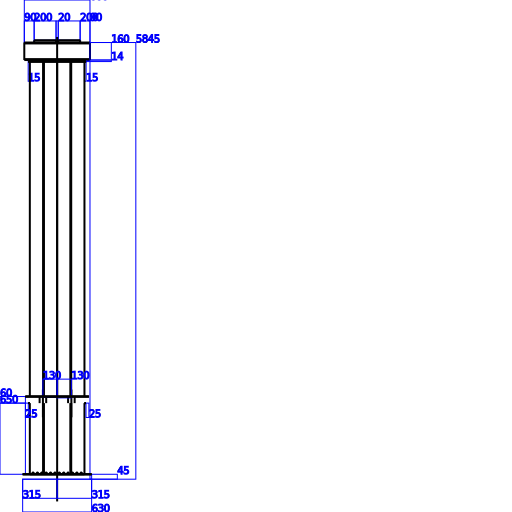

In [17]:
from processing import query_collection_to_dataframe
from plot_graphics import generate_file

for f_id in file_ids[:3]:
    # f_id = '1317d221-8d9e-4e2e-b290-3be2a0aa67fb'
    debug_data = query_collection_to_dataframe(objects, f_id)    
    
    d, _ = generate_file(debug_data,save_file=False, draw_dimensions=True, draw_texts=True, main_stroke='2')
    display(d)